In [14]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os

num_classes = 81
img_rows, img_cols = 32,32
batch_size = 16

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'C:/Users/patilpra/Desktop/New folder/ANN/Cv/12. Types of Optimizers, Learning Rates & Callbacks Build a Fruit Classifier/fruits-360/train'
validation_data_dir = 'C:/Users/patilpra/Desktop/New folder/ANN/Cv/12. Types of Optimizers, Learning Rates & Callbacks Build a Fruit Classifier/fruits-360/validation'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 30,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True
                                                   )

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                   target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False
                                                   )

Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same',
         input_shape = (img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [27]:
from keras.optimizers import RMSprop,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint('C:/Users/patilpra/Desktop/New folder/Projects/cv/fruits_fresh_cnn_1.h5',
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1
                            )

earlystop = EarlyStopping(monitor='val_loss',
                         min_delta=0,
                         patience=3,
                         verbose =1,
                         
                         restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks= [earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics=['accuracy'])

nb_train_samples = 41322
nn_validation_samples =13877
epochs =3

history = model.fit_generator(train_generator,
                             steps_per_epoch=nb_train_samples//batch_size,
                             epochs=epochs,
                             callbacks=callbacks,
                             validation_data=validation_generator,
                             validation_steps=nb_train_samples//batch_size
                             )

Epoch 1/3
2582/2582 [==============================] - 2550s 988ms/step - loss: 1.3189 - accuracy: 0.5736 - val_loss: 0.0033 - val_accuracy: 0.8816

Epoch 00001: val_loss improved from inf to 0.00325, saving model to C:/Users/patilpra/Desktop/New folder/Projects/cv/fruits_fresh_cnn_1.h5
Epoch 2/3
2582/2582 [==============================] - 2249s 871ms/step - loss: 0.5901 - accuracy: 0.8125 - val_loss: 0.2278 - val_accuracy: 0.7701

Epoch 00002: val_loss did not improve from 0.00325
Epoch 3/3
2582/2582 [==============================] - 1470s 569ms/step - loss: 0.4967 - accuracy: 0.8538 - val_loss: 7.2134 - val_accuracy: 0.9246

Epoch 00003: val_loss did not improve from 0.00325


In [32]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np

Y_pred = model.predict_generator(validation_generator,nn_validation_samples//batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print("confusion matrix")
print(confusion_matrix(validation_generator.classes,y_pred))
print("classification report")
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes,y_pred,target_names=target_names))

confusion matrix
[[164   0   0 ...   0   0   0]
 [  0 162   0 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
classification report


NameError: name 'class_labels' is not defined

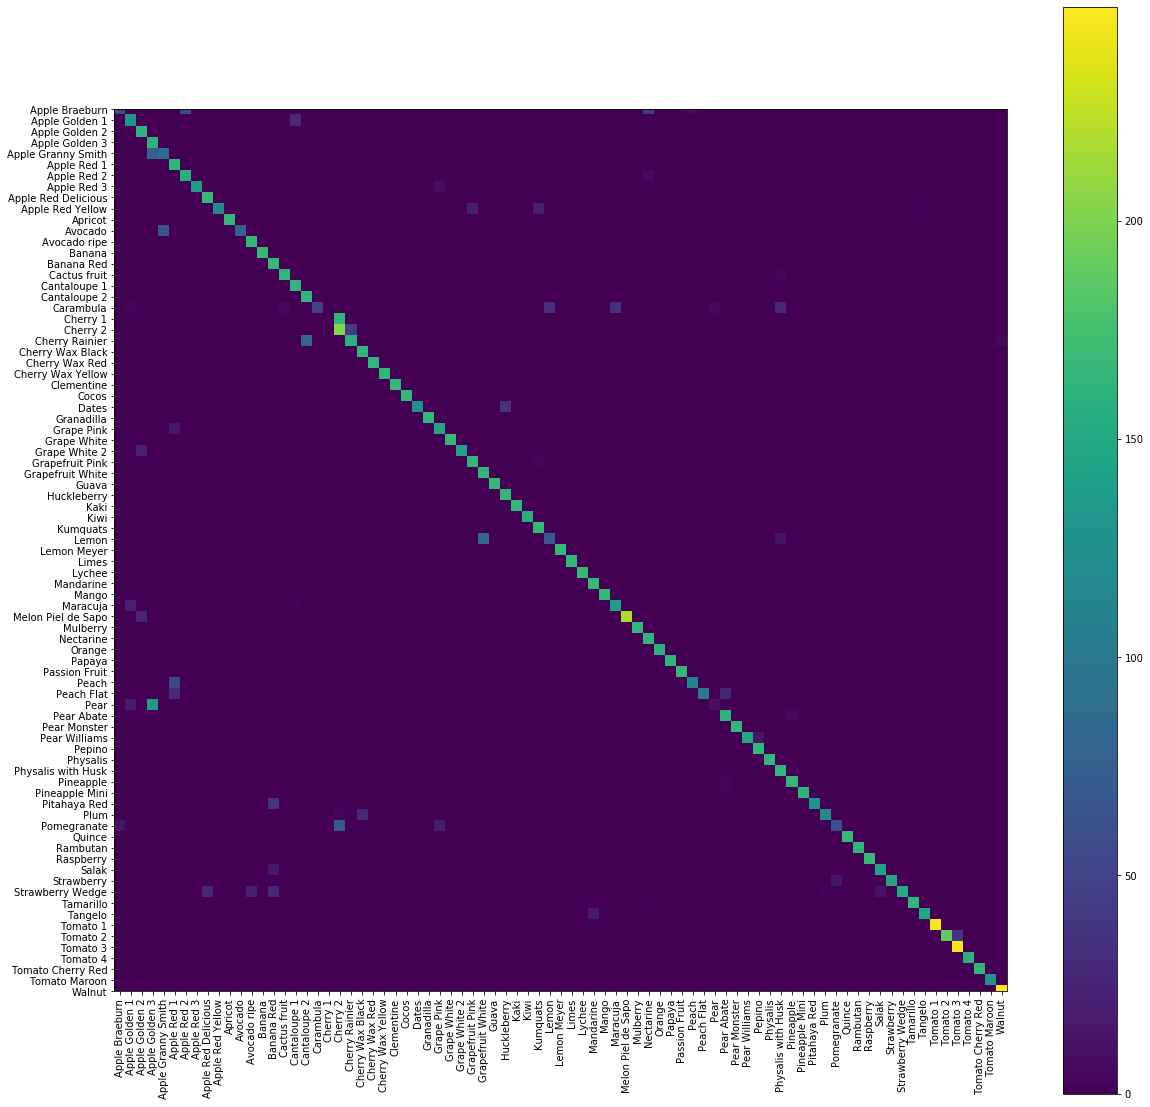

In [38]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row,img_height,img_depth = 32,32,3
model =load_model('C:/Users/patilpra/Desktop/New folder/Projects/cv/fruits_fresh_cnn_1.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nn_validation_samples=13877

Y_pred = model.predict_generator(validation_generator, nn_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())
plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix,interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_=plt.xticks(tick_marks,classes, rotation =90)
_=plt.yticks(tick_marks, classes)

In [54]:

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = 'C:/Users/patilpra/Desktop/New folder/ANN/Cv/12. Types of Optimizers, Learning Rates & Callbacks Build a Fruit Classifier/fruits-360/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()